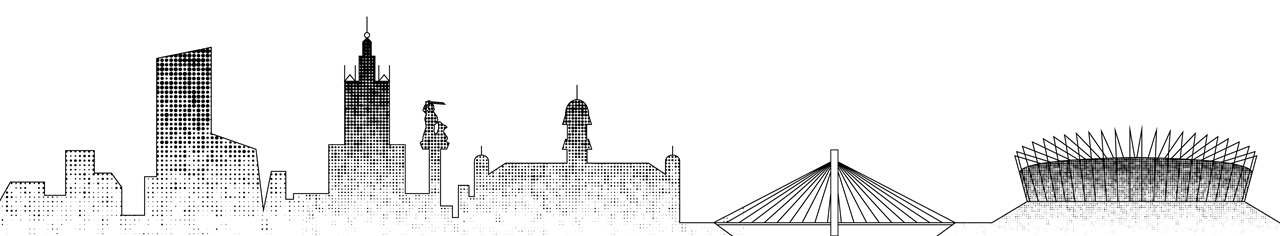

# Analysis of venues and housing prices in Warsaw

## Introduction to the analysis and statement of the business problems

The analysis will concern city of Warsaw (capital of Poland) and it's 18 districts. As the city is developing really rapidly and attracts many international students and workers willing to live and work in Warsaw, this analysis contain two aspects:
- clustering of the districts based on what kind of venues are dominantly in the district
- followed by an analysis what is the average price of square meter of a new flat

This recipient of the analysis will be people willing to relocate to Warsaw and buy a new flat. The outcome will help them to choose what kind of districts they would like to live (with many shops vs. with many factories) vs. what kind of district they can afford.

## Data where you describe the data that will be used to solve the problem and the source of the data.

In this analysis I will use different sources of data which will include:
- geolocation coordinates of Warsaw - to visualize the data on the maps using folium module
- geolocation coordinates of "centers" of each Warsaw district (18 of them) - to visualize the data on the maps as well as input for Foursquares API
- data from Foursquares database on venues that are around "center" of each Warsaw districts - their location, name and type of venues so that I will cluster in the next part of the analysis if the district is an industrial one or many services (shops, restaurants etc)
- average prices per 1 square meter of flat in Warsaw in 2019 - to visualize it on the choropleth map

## Methodology section which represents the main component of the report

## Part 1 - this part contains basic first steps to:
- load libraries, 
- load data, 
- prepare the data for further analysis,
- check the quality of data

In [1]:
#Installing/importing necessary packages

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    ------------------------------------------------------------
                       

## Loading source data - geolocation data of Warsaw districts and average flat prices for 2019

In [2]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude
0,Warsaw,Bemowo,52.238974,20.913288
1,Warsaw,Bialoleka,52.312681,21.039304
2,Warsaw,Bielany,52.285043,20.943949
3,Warsaw,Mokotow,52.202299,21.013035
4,Warsaw,Ochota,52.212225,20.972630


In [3]:
################
body = client_623fefa1f66c4e419a087f8a70e4d923.get_object(Bucket='courseracapstoneproject-donotdelete-pr-kvodhzqroofnhj',Key='warsawprices.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Warsaw_prices = pd.read_csv(body)
Warsaw_prices.head()

,Borough,Neighborhood,Price_2019,Price_2018
0,Warsaw,Bemowo,8975,7908
1,Warsaw,Bialoleka,7497,6816
2,Warsaw,Bielany,9510,8359
3,Warsaw,Mokotow,11385,9965
4,Warsaw,Ochota,10721,9596


## Preparing data for further analysis

In [4]:
Warsaw_df = pd.merge(Warsaw_geo, Warsaw_prices, on = 'Neighborhood')
Warsaw_df.drop(['Borough_y'], axis = 1, inplace = True)
Warsaw_df.rename(columns={"Borough_x": "Borough"}, inplace = True)

Warsaw_df.head()

,Borough,Neighborhood,Latitude,Longitude,Price_2019,Price_2018
0,Warsaw,Bemowo,52.238974,20.913288,8975,7908
1,Warsaw,Bialoleka,52.312681,21.039304,7497,6816
2,Warsaw,Bielany,52.285043,20.943949,9510,8359
3,Warsaw,Mokotow,52.202299,21.013035,11385,9965
4,Warsaw,Ochota,52.212225,20.972630,10721,9596


In [5]:
address = 'Warsaw, PL'

geolocator = Nominatim(user_agent="Warsaw")
location = geolocator.geocode(address)
latitude_warsaw = location.latitude
longitude_warsaw = location.longitude

print('The geograpical coordinate of Warsaw are {}, {}.'.format(latitude_warsaw, longitude_warsaw))

The geograpical coordinate of Warsaw are 52.2337172, 21.07141112883227.


## Let's check if the geolocation coordinates for Warsaw districts make sense - i.e. is the data correct?

In [6]:
map_warsaw = folium.Map(location=[latitude_warsaw, longitude_warsaw], zoom_start=11)

#add markers to map
for lat, lng, borough, Neighbourhood in zip(Warsaw_df['Latitude'], Warsaw_df['Longitude'], Warsaw_df['Borough'], Warsaw_df['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_warsaw)  
    
map_warsaw

## Part 2 - in this part we will load the data from Foursquare, check it's quality and visualize

## Loading credentials for Foursquare access and function needed to get nearby venues from Frousquare in each and every district

In [7]:
# The code was removed by Watson Studio for sharing.

In [8]:
# defining radius and limit of venues to get
radius=1500
LIMIT=1500

In [9]:
import requests

def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Getting the data from Foursquare

In [11]:
warsaw_venues = getNearbyVenues(names=Warsaw_df['Neighborhood'],latitudes=Warsaw_df['Latitude'],longitudes=Warsaw_df['Longitude'])

Bemowo
Bialoleka
Bielany
Mokotow
Ochota
Praga-Polnoc
Praga-Poludnie
Rembertow
Srodmiescie
Targowek
Ursus
Ursynow
Wawer
Wesola
Wilanow
Wlochy
Wola
Zoliborz


In [12]:
warsaw_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bemowo,52.238974,20.913288,CieKawa,52.242059,20.913374,Café
1,Bemowo,52.238974,20.913288,Zdrofit Bemowo,52.245641,20.906136,Gym / Fitness Center
2,Bemowo,52.238974,20.913288,Park Gorczewska,52.233976,20.905266,Park
3,Bemowo,52.238974,20.913288,La Fiaccola,52.240811,20.912208,Italian Restaurant
4,Bemowo,52.238974,20.913288,Lidl,52.239942,20.913861,Food & Drink Shop
5,Bemowo,52.238974,20.913288,Belgian Chocolate Club,52.241646,20.929986,Café
6,Bemowo,52.238974,20.913288,Yogen Früz,52.241781,20.933303,Dessert Shop
7,Bemowo,52.238974,20.913288,Decathlon Bemowo,52.240792,20.891503,Sporting Goods Shop
8,Bemowo,52.238974,20.913288,McDonald's,52.239161,20.897947,Fast Food Restaurant
9,Bemowo,52.238974,20.913288,Bajkolandia,52.247889,20.915371,Playground


In [13]:
warsaw_venues.shape

(961, 7)

## Let's check how many venues were loaded for each and every district

In [14]:
map_warsaw = folium.Map(location=[latitude_warsaw, longitude_warsaw], zoom_start=11)

warsaw_venues['Borough'] = 'Warsaw'

#add markers to map
for lat, lng, borough, Neighbourhood in zip(warsaw_venues['Venue Latitude'], warsaw_venues['Venue Longitude'], warsaw_venues['Borough'], warsaw_venues['Neighborhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_warsaw)  
    
map_warsaw

In [15]:
warsaw_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough
Neighborhood,,,,,,,
Bemowo,59,59,59,59,59,59,59
Bialoleka,5,5,5,5,5,5,5
Bielany,40,40,40,40,40,40,40
Mokotow,100,100,100,100,100,100,100
Ochota,100,100,100,100,100,100,100
Praga-Polnoc,69,69,69,69,69,69,69
Praga-Poludnie,61,61,61,61,61,61,61
Rembertow,6,6,6,6,6,6,6
Srodmiescie,100,100,100,100,100,100,100


## Part 3 - clustering
- this section starts with one-hot encoding of venue data for Warsaw districts for the purpose of clustering
- using the elbow method I am looking for the best fit in terms of number of clusters for the K-means clustering method
- due to lack of clear "answer" from elbow method I have decided to cluster the districts with 10 clusters but also to seek for a different clustering method
- K-means clustering method
- DBSCAN clustering method

In [16]:
# one hot encoding
warsaw_onehot = pd.get_dummies(warsaw_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
warsaw_onehot['Neighborhood'] = warsaw_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [warsaw_onehot.columns[-1]] + list(warsaw_onehot.columns[:-1])
warsaw_onehot.head()

,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
warsaw_onehot.shape

(961, 186)

In [18]:
warsaw_grouped = warsaw_onehot.groupby('Neighborhood').mean().reset_index()
warsaw_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Wine Bar,Wine Shop,Yoga Studio,Zoo,Zoo Exhibit
0,Bemowo,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Bialoleka,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Bielany,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.025000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Mokotow,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.020000,...,0.00,0.01,0.030000,0.000000,0.000000,0.01,0.010000,0.000000,0.000000,0.000000
4,Ochota,0.000000,0.000000,0.030000,0.000000,0.01,0.00,0.000000,0.000000,0.010000,...,0.01,0.00,0.010000,0.010000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000
5,Praga-Polnoc,0.000000,0.000000,0.000000,0.014493,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.014493,0.014493,0.057971
6,Praga-Poludnie,0.000000,0.016393,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Rembertow,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
8,Srodmiescie,0.000000,0.000000,0.000000,0.000000,0.00,0.01,0.000000,0.010000,0.010000,...,0.01,0.00,0.050000,0.000000,0.000000,0.00,0.010000,0.010000,0.000000,0.000000
9,Targowek,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [19]:
num_top_venues = 5

for hood in warsaw_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = warsaw_grouped[warsaw_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bemowo----
            venue  freq
0     Coffee Shop  0.08
1     Supermarket  0.08
2            Café  0.07
3     Pizza Place  0.05
4  Clothing Store  0.05


----Bialoleka----
           venue  freq
0    Supermarket   0.4
1      Drugstore   0.2
2    Pizza Place   0.2
3  Deli / Bodega   0.2
4            Pub   0.0


----Bielany----
           venue  freq
0  Grocery Store  0.12
1           Café  0.10
2    Coffee Shop  0.08
3            Gym  0.05
4     Restaurant  0.05


----Mokotow----
                           venue  freq
0                    Coffee Shop  0.09
1                           Café  0.05
2                   Burger Joint  0.04
3                 Ice Cream Shop  0.04
4  Vegetarian / Vegan Restaurant  0.03


----Ochota----
                venue  freq
0         Coffee Shop  0.06
1                Park  0.06
2  Italian Restaurant  0.05
3                Café  0.04
4         Supermarket  0.04


----Praga-Polnoc----
                  venue  freq
0           Zoo Exhibit  0.06
1      

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighborhood'] = warsaw_grouped['Neighborhood']

for ind in np.arange(warsaw_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(warsaw_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bemowo,Supermarket,Coffee Shop,Café,Pizza Place,Clothing Store,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Shoe Store,Shopping Mall
1,Bialoleka,Supermarket,Deli / Bodega,Pizza Place,Drugstore,Farmers Market,French Restaurant,Forest,Food Court,Food & Drink Shop,Food
2,Bielany,Grocery Store,Café,Coffee Shop,Restaurant,Pizza Place,Gym,Bookstore,Bus Station,Metro Station,Supermarket
3,Mokotow,Coffee Shop,Café,Burger Joint,Ice Cream Shop,Park,Polish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Dessert Shop,Theater
4,Ochota,Park,Coffee Shop,Italian Restaurant,Supermarket,Café,Gym / Fitness Center,Pizza Place,Hotel,Diner,American Restaurant


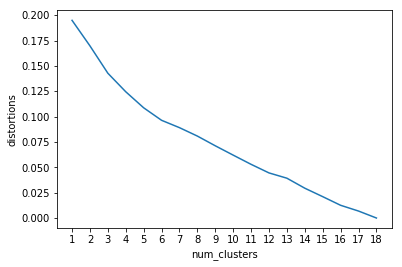

In [23]:
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt

distortions = []
num_clusters = range(1, 19)

warsaw_grouped_clustering = warsaw_grouped.drop('Neighborhood', 1)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    kmeanModel = KMeans(n_clusters=i).fit(warsaw_grouped_clustering)
    kmeanModel.fit(warsaw_grouped_clustering)
    distortions.append(sum(np.min(cdist(warsaw_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / warsaw_grouped_clustering.shape[0])

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

## This doesn't look too promising - but I will try with 10 clusters and let's see if it will make sense. But I will also add additional way of clustering - DBSCAN, to see if it won't be better.

In [24]:
# set number of clusters
kclusters = 10

warsaw_grouped_clustering = warsaw_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(warsaw_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([9, 1, 0, 3, 9, 9, 9, 5, 3, 2, 8, 9, 4, 6, 3, 7, 0, 3], dtype=int32)

In [41]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels', kmeans.labels_)

warsaw_merged = Warsaw_df

# merge warsaw_grouped with warsaw_data to add latitude/longitude for each neighborhood
warsaw_merged = warsaw_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

warsaw_merged

,Borough,Neighborhood,Latitude,Longitude,Price_2019,Price_2018,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Warsaw,Bemowo,52.238974,20.913288,8975,7908,9,Supermarket,Coffee Shop,Café,Pizza Place,Clothing Store,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Shoe Store,Shopping Mall
1,Warsaw,Bialoleka,52.312681,21.039304,7497,6816,1,Supermarket,Deli / Bodega,Pizza Place,Drugstore,Farmers Market,French Restaurant,Forest,Food Court,Food & Drink Shop,Food
2,Warsaw,Bielany,52.285043,20.943949,9510,8359,0,Grocery Store,Café,Coffee Shop,Restaurant,Pizza Place,Gym,Bookstore,Bus Station,Metro Station,Supermarket
3,Warsaw,Mokotow,52.202299,21.013035,11385,9965,3,Coffee Shop,Café,Burger Joint,Ice Cream Shop,Park,Polish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Dessert Shop,Theater
4,Warsaw,Ochota,52.212225,20.972630,10721,9596,9,Park,Coffee Shop,Italian Restaurant,Supermarket,Café,Gym / Fitness Center,Pizza Place,Hotel,Diner,American Restaurant
5,Warsaw,Praga-Polnoc,52.264884,21.027344,9171,8216,9,Zoo Exhibit,Fast Food Restaurant,Bus Station,Diner,Coffee Shop,Bistro,Plaza,Supermarket,Convenience Store,Nightclub
6,Warsaw,Praga-Poludnie,52.229806,21.094373,9200,8254,9,Supermarket,Bus Station,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Bookstore,Park,Grocery Store,Restaurant
7,Warsaw,Rembertow,52.261415,21.162819,6944,6185,5,Supermarket,Park,Bus Station,Café,Gym Pool,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
8,Warsaw,Srodmiescie,52.232810,21.019067,13720,12576,3,Café,Cocktail Bar,Vegetarian / Vegan Restaurant,Beer Bar,Coffee Shop,Boutique,Sushi Restaurant,Theater,Dessert Shop,Hotel
9,Warsaw,Targowek,52.284710,21.069600,7882,7119,2,Bus Station,Plaza,Market,Bus Stop,Food & Drink Shop,Pizza Place,Eastern European Restaurant,Park,Clothing Store,Food Court


In [26]:
# create map
map_clusters = folium.Map(location=[latitude_warsaw, longitude_warsaw], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(warsaw_merged['Latitude'], warsaw_merged['Longitude'], warsaw_merged['Neighborhood'], warsaw_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [27]:
from sklearn.cluster import DBSCAN 

epsilon = 0.2
minimumSamples = 4
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(warsaw_grouped_clustering)
labels = db.labels_
labels

array([ 0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0,
        0])

In [28]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster_Labels_DBSCAN', db.labels_)

warsaw_merged = Warsaw_df

# merge warsaw_grouped with warsaw_data to add latitude/longitude for each neighborhood
warsaw_merged = warsaw_merged.join(neighbourhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

warsaw_merged

,Borough,Neighborhood,Latitude,Longitude,Price_2019,Price_2018,Cluster_Labels_DBSCAN,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Warsaw,Bemowo,52.238974,20.913288,8975,7908,0,9,Supermarket,Coffee Shop,Café,Pizza Place,Clothing Store,Gym / Fitness Center,Electronics Store,Fast Food Restaurant,Shoe Store,Shopping Mall
1,Warsaw,Bialoleka,52.312681,21.039304,7497,6816,-1,1,Supermarket,Deli / Bodega,Pizza Place,Drugstore,Farmers Market,French Restaurant,Forest,Food Court,Food & Drink Shop,Food
2,Warsaw,Bielany,52.285043,20.943949,9510,8359,0,0,Grocery Store,Café,Coffee Shop,Restaurant,Pizza Place,Gym,Bookstore,Bus Station,Metro Station,Supermarket
3,Warsaw,Mokotow,52.202299,21.013035,11385,9965,0,3,Coffee Shop,Café,Burger Joint,Ice Cream Shop,Park,Polish Restaurant,Vegetarian / Vegan Restaurant,Italian Restaurant,Dessert Shop,Theater
4,Warsaw,Ochota,52.212225,20.972630,10721,9596,0,9,Park,Coffee Shop,Italian Restaurant,Supermarket,Café,Gym / Fitness Center,Pizza Place,Hotel,Diner,American Restaurant
5,Warsaw,Praga-Polnoc,52.264884,21.027344,9171,8216,0,9,Zoo Exhibit,Fast Food Restaurant,Bus Station,Diner,Coffee Shop,Bistro,Plaza,Supermarket,Convenience Store,Nightclub
6,Warsaw,Praga-Poludnie,52.229806,21.094373,9200,8254,0,9,Supermarket,Bus Station,Fast Food Restaurant,Coffee Shop,Sushi Restaurant,Italian Restaurant,Bookstore,Park,Grocery Store,Restaurant
7,Warsaw,Rembertow,52.261415,21.162819,6944,6185,-1,5,Supermarket,Park,Bus Station,Café,Gym Pool,Food Court,Food & Drink Shop,Food,Flower Shop,Flea Market
8,Warsaw,Srodmiescie,52.232810,21.019067,13720,12576,0,3,Café,Cocktail Bar,Vegetarian / Vegan Restaurant,Beer Bar,Coffee Shop,Boutique,Sushi Restaurant,Theater,Dessert Shop,Hotel
9,Warsaw,Targowek,52.284710,21.069600,7882,7119,-1,2,Bus Station,Plaza,Market,Bus Stop,Food & Drink Shop,Pizza Place,Eastern European Restaurant,Park,Clothing Store,Food Court


In [29]:
# create map
map_clusters = folium.Map(location=[latitude_warsaw, longitude_warsaw], zoom_start=11)

# set color scheme for the clusters
x = np.arange(2)
ys = [i + x + (i*x)**2 for i in range(2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(warsaw_merged['Latitude'], warsaw_merged['Longitude'], warsaw_merged['Neighborhood'], warsaw_merged['Cluster_Labels_DBSCAN']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Let's add the average prices of flats in each district to see if there is any dependence but the cluster and average price 

In [35]:
Warsaw_prices.insert(0, 'Cluster_Labels', kmeans.labels_)
Warsaw_prices.sort_values(by=['Price_2019'], ascending=False)

,Cluster_Labels,Borough,Neighborhood,Price_2019,Price_2018
8,3,Warsaw,Srodmiescie,13720,12576
17,3,Warsaw,Zoliborz,11858,10415
3,3,Warsaw,Mokotow,11385,9965
16,0,Warsaw,Wola,11073,9803
4,9,Warsaw,Ochota,10721,9596
14,3,Warsaw,Wilanow,10697,9952
2,0,Warsaw,Bielany,9510,8359
11,9,Warsaw,Ursynow,9431,8686
6,9,Warsaw,Praga-Poludnie,9200,8254
5,9,Warsaw,Praga-Polnoc,9171,8216


In [38]:
Warsaw_prices.groupby('Cluster_Labels').mean().sort_values(by=['Price_2019'], ascending=False)

,Price_2019,Price_2018
Cluster_Labels,,
3,11915.0,10727.0
0,10291.5,9081.0
9,9499.6,8532.0
7,8779.0,7993.0
8,8291.0,7088.0
2,7882.0,7119.0
1,7497.0,6816.0
4,7347.0,7092.0
5,6944.0,6185.0


# Results section

Even with the not so promising result from the elbow method I have arrived with a k-means and DBSCAN clusters that show quite good sense from the interpretation point of view - districts with many services are clustered together, industrial districts with not so many restaurants, shops, cafes etc are separately.

This dependence is also visible when comparing to average prices. Segments #0, #3 and #9 present higher average prices for flats in 2019 compared to other segments.

Those results of clustering and compared with average prices should help a newcomer to Warsaw or a person willing to change a flat to make an insight driven decision.

# Discussion section

I am not entirely happy with the clustering results for the k-means method, this could have happened due to:
- Problems with geolocation coordinates for district centers (the official data, especially for high area district was pointing in the middle of nowhere)
- Lack of some of the venues for Warsaw in Foursquare (I am not sure there are all of the venues for Warsaw in this database)
- Maybe a different method of clustering should be used for a such a highly diversified city with so much heterogeneous districts

# Conclusion section

With the results of the clustering exercise but also with the average flat prices to a person looking for a flat in Warsaw I can make certain recommendations:
- If a person is looking for a cultural and really party like districts (and is able to pay a high price for the flat) the best choice would be Srodmiescie and Zoliborz districts
- If a person is looking for a quite good living experience but still do not want to pay a lot - Wilanow (cheapest district from cluster #3) and Bielany (cheapest district from cluster #0) seem to be the best option
- If 